In [546]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as   np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [547]:
#import pandas to get data
import pandas as pd

In [548]:
churn = pd.read_csv("C:/Users/torim/Documents/enterprise/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn=churn.drop(['customerID'], axis=1)
churn=churn.drop(['TotalCharges'], axis=1)
churn['Churn'] = [1 if x =='Yes' else 0 for x in churn['Churn']] 
churn=churn.dropna()

In [549]:
churn.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  Churn  
0              Yes           Electronic check           29.85      0  
1               No               Mailed check           56.95      0  
2              Yes               Mailed check           53.85      1  
3               No  Bank transfer (automatic)           42.30      0  
4              Yes           Electronic check           70.70      1

In [550]:
churn=churn[churn.tenure>0]

In [551]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(1), int64(3), object(15)
memory usage: 1.1+ MB


In [552]:
churn["InternetService"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [553]:
churn["PaperlessBilling"].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [554]:
#plotting with matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
churn.hist(bins=25, figsize=(20,20))
plt.show()

In [555]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [556]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [557]:
train_set, test_set = split_train_test(churn, 0.2)
print(len(train_set), "train +", len(test_set), "test")

5626 train + 1406 test


In [558]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [559]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [560]:
churn_with_index = churn.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(churn_with_index, 0.2, "index")

In [561]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(churn, test_size=0.2, random_state=42)

In [562]:
test_set.head()


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2481    Male              1     Yes         No      61          Yes   
6784  Female              0      No         No      19          Yes   
6125    Male              0     Yes         No      13          Yes   
3052    Male              0     Yes         No      37          Yes   
4099  Female              0      No         No       6           No   

         MultipleLines InternetService       OnlineSecurity  \
2481               Yes              No  No internet service   
6784               Yes              No  No internet service   
6125               Yes     Fiber optic                   No   
3052               Yes             DSL                  Yes   
4099  No phone service             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
2481  No internet service  No internet service  No internet service   
6784  No internet service  No internet service  No internet service   
6125                   No                  Yes                   No   
3052                   No                   No                   No   
4099                   No                   No                   No   

              StreamingTV      StreamingMovies        Contract  \
2481  No internet service  No internet service        Two year   
6784  No internet service  No internet service  Month-to-month   
6125                  Yes                  Yes  Month-to-month   
3052                   No                   No  Month-to-month   
4099                   No                   No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  Churn  
2481               No  Bank transfer (automatic)           25.00      0  
6784               No  Bank transfer (automatic)           24.70      0  
6125              Yes    Credit card (automatic)          102.25      1  
3052              Yes               Mailed check           55.05      0  
4099               No  Bank transfer (automatic)           29.45      0

In [563]:
churn["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
64     80
52     80
     ... 
29     72
20     71
53     70
62     70
41     70
32     69
47     68
51     68
54     68
50     68
58     67
49     66
57     65
37     65
31     65
43     65
34     65
42     65
40     64
48     64
33     64
55     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

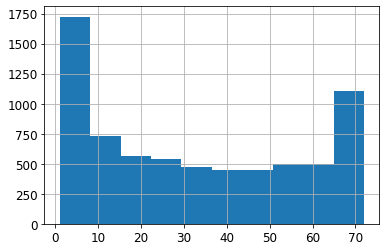

In [564]:
churn["tenure"].hist()

In [565]:
churn["tenure_cat"] = pd.cut(churn["tenure"],
                               bins=[0,5,10,15,20,25,70,np.inf],
                               labels=[1, 2, 3, 4,5,6,7])
# Label those above 5 as 5
churn["tenure_cat"].where(churn["tenure_cat"] < 7, 7.0, inplace=True)

In [566]:
churn["tenure_cat"].value_counts()

6    3222
1    1360
2     599
7     532
3     500
5     411
4     408
Name: tenure_cat, dtype: int64

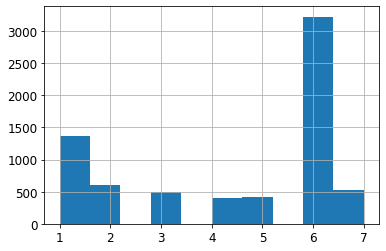

In [567]:
churn["tenure_cat"].hist()

In [568]:
churn["tenure_cat"].value_counts() / len(churn)

6    0.458191
1    0.193402
2    0.085182
7    0.075654
3    0.071104
5    0.058447
4    0.058020
Name: tenure_cat, dtype: float64

In [569]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(churn, churn["tenure_cat"]):
    strat_train_set = churn.loc[train_index]
    strat_test_set = churn.loc[test_index]

C:\Users\torim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
C:\Users\torim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [570]:
strat_test_set["tenure_cat"].value_counts() / len(strat_test_set)

6    0.456290
1    0.205402
2    0.079602
3    0.068230
4    0.063966
7    0.063255
5    0.062544
Name: tenure_cat, dtype: float64

In [571]:
churn["tenure_cat"].value_counts() / len(churn)

6    0.458191
1    0.193402
2    0.085182
7    0.075654
3    0.071104
5    0.058447
4    0.058020
Name: tenure_cat, dtype: float64

In [572]:
def tenure_cat_proportions(data):
    return data["tenure_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(churn, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": tenure_cat_proportions(churn),
    "Stratified": tenure_cat_proportions(strat_test_set),
    "Random": tenure_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [573]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.193402    0.205402  0.191187     -1.145115       6.204691
2  0.085182    0.079602  0.073205    -14.060036      -6.550719
3  0.071104    0.068230  0.072495      1.956503      -4.040938
4  0.058020    0.063966  0.071073     22.496760      10.247084
5  0.058447    0.062544  0.055437     -5.149954       7.010308
6  0.458191    0.456290  0.459844      0.360660      -0.414925
7  0.075654    0.063255  0.076759      1.460474     -16.389054

In [574]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("tenure_cat", axis=1, inplace=True)

In [575]:
churn1 = strat_train_set.copy()
churn1.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5882  Female            0.0     Yes        Yes    14.0          Yes   
3614    Male            0.0     Yes         No    69.0           No   
923   Female            0.0     Yes         No    63.0          Yes   
609   Female            1.0     Yes         No    65.0          Yes   
5042    Male            0.0     Yes        Yes    19.0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
5882                No              No  No internet service   
3614  No phone service             DSL                  Yes   
923                Yes             DSL                  Yes   
609                Yes     Fiber optic                  Yes   
5042                No              No  No internet service   

             OnlineBackup     DeviceProtection          TechSupport  \
5882  No internet service  No internet service  No internet service   
3614                   No                  Yes                  Yes   
923                   Yes                   No                   No   
609                    No                  Yes                   No   
5042  No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies        Contract  \
5882  No internet service  No internet service        Two year   
3614                  Yes                  Yes        Two year   
923                   Yes                  Yes        One year   
609                   Yes                  Yes  Month-to-month   
5042  No internet service  No internet service        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  Churn  
5882              Yes               Mailed check           19.70    0.0  
3614               No  Bank transfer (automatic)           60.25    0.0  
923               Yes    Credit card (automatic)           79.70    0.0  
609                No  Bank transfer (automatic)          105.25    1.0  
5042               No               Mailed check           19.80    0.0

In [576]:
corr_matrix = churn1.corr()
corr_matrix

SeniorCitizen    tenure  MonthlyCharges     Churn
SeniorCitizen        1.000000  0.006378        0.217116  0.153265
tenure               0.006378  1.000000        0.240910 -0.357045
MonthlyCharges       0.217116  0.240910        1.000000  0.194014
Churn                0.153265 -0.357045        0.194014  1.000000

In [577]:
corr_matrix["tenure"].sort_values(ascending=False)

tenure            1.000000
MonthlyCharges    0.240910
SeniorCitizen     0.006378
Churn            -0.357045
Name: tenure, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A812C24828>,
      dtype=object)

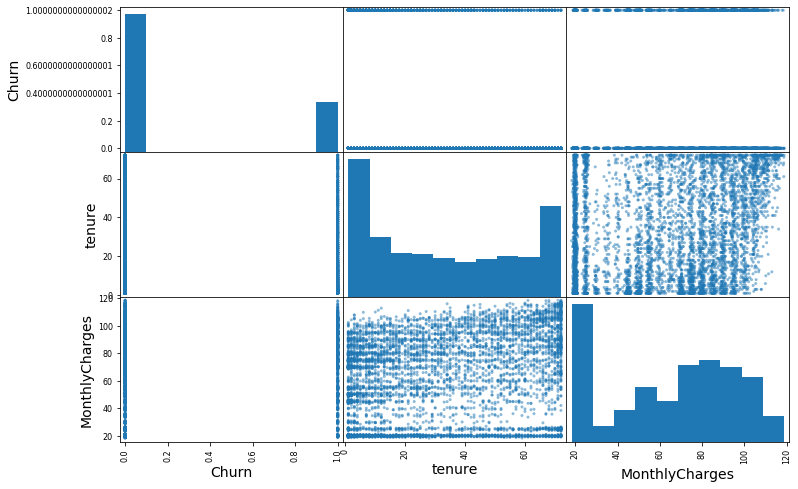

In [578]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Churn", "tenure", "MonthlyCharges"]
scatter_matrix(churn1[attributes], figsize=(12, 8))

[0, 80, 0, 150]

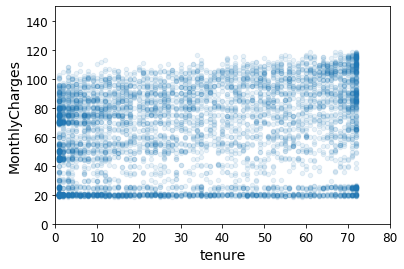

In [579]:
churn1.plot(kind="scatter", x="tenure", y="MonthlyCharges",
             alpha=0.1)
plt.axis([0, 80, 0, 150])

[15, 130, 0, 80]

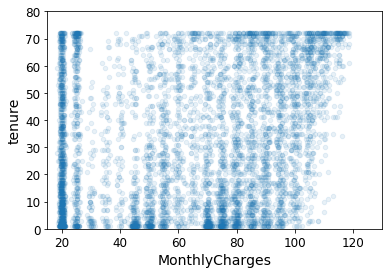

In [580]:
churn1.plot(kind="scatter", x="MonthlyCharges", y="tenure",
             alpha=0.1)
plt.axis([15, 130, 0, 80])

In [581]:
churn1.describe()

SeniorCitizen       tenure  MonthlyCharges        Churn
count    5615.000000  5615.000000     5615.000000  5615.000000
mean        0.164381    32.632235       64.778780     0.263758
std         0.370654    24.597956       30.152966     0.440709
min         0.000000     1.000000       18.250000     0.000000
25%         0.000000     9.000000       35.475000     0.000000
50%         0.000000    29.000000       70.350000     0.000000
75%         0.000000    56.000000       89.850000     1.000000
max         1.000000    72.000000      118.750000     1.000000

In [582]:
#### Prep for machine learning 

In [695]:
#setting predictors and target variable
churn = strat_train_set.drop("Churn", axis=1) # drop labels for training set
churn_labels = strat_train_set["Churn"].copy()

In [696]:
churn_labels=churn_labels.dropna()
type(churn_labels[0])

numpy.float64

In [697]:
#finding incomplete rows in data
sample_incomplete_rows = churn[churn.isnull().any(axis=1)].head()
sample_incomplete_rows

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
3826    NaN            NaN     NaN        NaN     NaN          NaN   
6754    NaN            NaN     NaN        NaN     NaN          NaN   
6670    NaN            NaN     NaN        NaN     NaN          NaN   
1340    NaN            NaN     NaN        NaN     NaN          NaN   
936     NaN            NaN     NaN        NaN     NaN          NaN   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
3826           NaN             NaN            NaN          NaN   
6754           NaN             NaN            NaN          NaN   
6670           NaN             NaN            NaN          NaN   
1340           NaN             NaN            NaN          NaN   
936            NaN             NaN            NaN          NaN   

     DeviceProtection TechSupport StreamingTV StreamingMovies Contract  \
3826              NaN         NaN         NaN             NaN      NaN   
6754              NaN         NaN         NaN             NaN      NaN   
6670              NaN         NaN         NaN             NaN      NaN   
1340              NaN         NaN         NaN             NaN      NaN   
936               NaN         NaN         NaN             NaN      NaN   

     PaperlessBilling PaymentMethod  MonthlyCharges  
3826              NaN           NaN             NaN  
6754              NaN           NaN             NaN  
6670              NaN           NaN             NaN  
1340              NaN           NaN             NaN  
936               NaN           NaN             NaN

In [698]:
sample_incomplete_rows.count()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

In [699]:
churn.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5882  Female            0.0     Yes        Yes    14.0          Yes   
3614    Male            0.0     Yes         No    69.0           No   
923   Female            0.0     Yes         No    63.0          Yes   
609   Female            1.0     Yes         No    65.0          Yes   
5042    Male            0.0     Yes        Yes    19.0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
5882                No              No  No internet service   
3614  No phone service             DSL                  Yes   
923                Yes             DSL                  Yes   
609                Yes     Fiber optic                  Yes   
5042                No              No  No internet service   

             OnlineBackup     DeviceProtection          TechSupport  \
5882  No internet service  No internet service  No internet service   
3614                   No                  Yes                  Yes   
923                   Yes                   No                   No   
609                    No                  Yes                   No   
5042  No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies        Contract  \
5882  No internet service  No internet service        Two year   
3614                  Yes                  Yes        Two year   
923                   Yes                  Yes        One year   
609                   Yes                  Yes  Month-to-month   
5042  No internet service  No internet service        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  
5882              Yes               Mailed check           19.70  
3614               No  Bank transfer (automatic)           60.25  
923               Yes    Credit card (automatic)           79.70  
609                No  Bank transfer (automatic)          105.25  
5042               No               Mailed check           19.80

In [700]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

In [701]:
churn_num=churn.select_dtypes(include=[np.number])

In [702]:
churn_num = churn[["tenure", "MonthlyCharges"]]

In [703]:
imputer.fit(churn_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [704]:
imputer.statistics_

array([29.  , 70.35])

In [705]:
#checking that the numbers are the same manually
churn_num.median().values

array([29.  , 70.35])

In [706]:
X = imputer.transform(churn_num)

In [707]:
churn_tr= pd.DataFrame(X, columns=churn_num.columns, index=churn.index)

In [708]:
churn_tr.loc[sample_incomplete_rows.index.values]

tenure  MonthlyCharges
3826    29.0           70.35
6754    29.0           70.35
6670    29.0           70.35
1340    29.0           70.35
936     29.0           70.35

In [709]:
imputer.strategy

'median'

In [710]:
churn_tr=pd.DataFrame(X, columns=churn_num.columns, index=churn_num.index)
churn_tr.head()

tenure  MonthlyCharges
5882    14.0           19.70
3614    69.0           60.25
923     63.0           79.70
609     65.0          105.25
5042    19.0           19.80

In [711]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [712]:
churn_cat = churn[['Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod']]

In [58]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder(sparse=False)
churn_cat_1hot = cat_encoder.fit_transform(churn_cat)
churn_cat_1hot

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [59]:
cat_encoder.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [713]:
from sklearn.base import BaseEstimator, TransformerMixin

In [714]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

churn_num_tr = num_pipeline.fit_transform(churn_num)

In [715]:
churn_num_tr

array([[-0.75793514, -1.49675045],
       [ 1.48016914, -0.15066481],
       [ 1.2360123 ,  0.49499156],
       ...,
       [ 0.01522815,  0.63275372],
       [-0.06615746,  0.20784875],
       [-1.205556  , -1.4917711 ]])

In [716]:
churn=churn.dropna()

In [717]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20
    
num_attribs = list(churn_num)
cat_attribs=[ 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod']
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

churn_prepared = full_pipeline.fit_transform(churn)

In [718]:
churn_prepared.shape

(5615, 37)

In [807]:
churn_labels.head()

5882    0.0
3614    0.0
923     0.0
609     1.0
5042    0.0
Name: Churn, dtype: float64

In [720]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [721]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(churn_prepared, churn_labels)

C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [722]:
print("Predictions", log_reg.predict(churn_prepared))

Predictions [0. 0. 0. ... 0. 0. 0.]


In [723]:
churn_predictions= lin_reg.predict(churn_prepared)
len(churn_predictions)

5615

In [724]:
#confusion matrix
churn_predictions = log_reg.predict(churn_prepared)
log_mat = confusion_matrix(churn_labels, churn_predictions)
confusion_matrix(churn_labels, churn_predictions)
recall_score(churn_labels, churn_predictions, average='macro')


0.7198437913947577

In [725]:
precision_score(churn_labels, churn_predictions, average='macro')

0.7505826210444322

In [817]:
#decision tree regressor
from sklearn.tree import DecisionTreeClassifier

tree_cla = DecisionTreeClassifier(random_state=10)
tree_cla.fit(churn_prepared, churn_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_



In [ ]:
#confusion matrix
churn_predictions = dtree_grid_search(churn_prepared,churn_labels,10)
tree_mat = confusion_matrix(churn_labels, churn_predictions)
confusion_matrix(churn_labels, churn_predictions)

recall_score(churn_labels, churn_predictions, average='macro')


In [823]:
precision_score(churn_labels, churn_predictions, average='macro')

ValueError: Found input variables with inconsistent numbers of samples: [5615, 2]

In [729]:
confusion_matrix(churn_labels, churn_predictions)

array([[4125,    9],
       [  30, 1451]], dtype=int64)

In [730]:
#tuning the model

In [731]:
#cross-validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, churn_prepared, churn_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [732]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.53807102 0.51662744 0.51834667 0.50266195 0.50133512 0.49236596
 0.51536118 0.5101466  0.52393683 0.52223297]
Mean: 0.5141085755476139
Standard deviation: 0.01243100686139955


In [733]:
lin_scores = cross_val_score(lin_reg, churn_prepared, churn_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Scores: [0.48237129 0.43837292 0.44840564 0.44840564 0.42848654 0.43468185
 0.45275941 0.44481565 0.417957   0.45667948]
Mean: 0.44529354192867654
Standard deviation: 0.016643321998036267


C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [734]:
#random forest classifier

from sklearn.ensemble import RandomForestClassifier

forest_cla = RandomForestClassifier(n_estimators=10, random_state=10)
forest_cla.fit(churn_prepared, churn_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [735]:
#confusion matrix
churn_predictions = forest_cla.predict(churn_prepared)
forest_mat = confusion_matrix(churn_labels, churn_predictions)
confusion_matrix(churn_labels, churn_predictions)
recall_score(churn_labels, churn_predictions, average='macro')

0.9559741077678983

In [736]:
precision_score(churn_labels, churn_predictions, average='macro')

0.9710700047618613

In [737]:
confusion_matrix(churn_labels, churn_predictions)

array([[4091,   43],
       [ 115, 1366]], dtype=int64)

In [738]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, churn_prepared, churn_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

C:\Users\torim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Scores: [0.51271575 0.46972393 0.47723999 0.50266195 0.47014239 0.45862695
 0.46442036 0.46249729 0.47766515 0.46824282]
Mean: 0.476393658572191
Standard deviation: 0.016774311512292785


In [739]:
scores = cross_val_score(lin_reg, churn_prepared, churn_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\torim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

count    10.000000
mean      0.445294
std       0.017544
min       0.417957
25%       0.435605
50%       0.446611
75%       0.451671
max       0.482371
dtype: float64

In [740]:
#SVC
from sklearn.svm import SVC

svm_clas = SVC(kernel="linear")
svm_clas.fit(churn_prepared, churn_labels)
churn_predictions = svm_clas.predict(churn_prepared)
#confusion matrix
churn_predictions = svm_clas.predict(churn_prepared)
tree_mat = confusion_matrix(churn_labels, churn_predictions)
confusion_matrix(churn_labels, churn_predictions)
recall_score(churn_labels, churn_predictions, average='macro')


0.7171176786301703

In [741]:
precision_score(churn_labels, churn_predictions, average='macro')

0.7480614788147328

In [742]:
confusion_matrix(churn_labels, churn_predictions)

array([[3710,  424],
       [ 686,  795]], dtype=int64)

In [803]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [125,150, 175,200], 'max_features': [20,24,26,30]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=10)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_cla, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(churn_prepared, churn_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max

In [804]:
grid_search.best_params_

{'max_features': 24, 'n_estimators': 150}

In [805]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [789]:
#up to ten features
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(churn_prepared, churn_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [790]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.47782529026229614 {'max_features': 7, 'n_estimators': 180}
0.475958048691248 {'max_features': 8, 'n_estimators': 189}
0.47949959074485976 {'max_features': 5, 'n_estimators': 103}
0.4807977935210134 {'max_features': 3, 'n_estimators': 75}
0.4781978636446434 {'max_features': 8, 'n_estimators': 117}
0.48005639324413557 {'max_features': 4, 'n_estimators': 104}
0.47782529026229614 {'max_features': 8, 'n_estimators': 131}
0.47931384617436334 {'max_features': 6, 'n_estimators': 53}
0.4796852633910226 {'max_features': 2, 'n_estimators': 88}
0.4772658848526337 {'max_features': 6, 'n_estimators': 130}


In [795]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.37662788e-01, 2.82056006e-01, 1.52737211e-02, 1.54245757e-02,
       2.20096315e-03, 2.23123996e-03, 1.36598344e-02, 2.15214983e-03,
       1.31015443e-02, 7.23038092e-03, 2.96287176e-02, 3.13515655e-04,
       4.73132392e-02, 2.16293910e-04, 6.99241575e-03, 1.57019564e-02,
       2.55756949e-04, 1.30840766e-02, 1.30092632e-02, 3.58996936e-04,
       1.25183341e-02, 2.83682784e-02, 2.54645162e-04, 1.14894617e-02,
       1.00509227e-02, 5.10044489e-04, 9.78041354e-03, 9.54713861e-03,
       2.04003845e-04, 1.00412925e-02, 1.10379790e-01, 4.03776138e-03,
       6.06178322e-03, 1.50943794e-02, 1.53434715e-02, 2.37703797e-02,
       1.46804645e-02])

In [796]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_)
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.28205600594053293, 'MonthlyCharges'),
 (0.23766278775715993, 'tenure'),
 (0.047313239155782325,
  array(['Month-to-month', 'One year', 'Two year'], dtype=object)),
 (0.029628717579041765,
  array(['No', 'No internet service', 'Yes'], dtype=object)),
 (0.01542457565079676, array(['No', 'Yes'], dtype=object)),
 (0.015273721122243683, array(['No', 'Yes'], dtype=object)),
 (0.013659834405416025,
  array(['No', 'No internet service', 'Yes'], dtype=object)),
 (0.013101544302774725,
  array(['No', 'No internet service', 'Yes'], dtype=object)),
 (0.007230380919960817,
  array(['No', 'No internet service', 'Yes'], dtype=object)),
 (0.002231239963493065, array(['DSL', 'Fiber optic', 'No'], dtype=object)),
 (0.0022009631541712615,
  array(['No', 'No phone service', 'Yes'], dtype=object)),
 (0.0021521498274391553,
  array(['No', 'No internet service', 'Yes'], dtype=object)),
 (0.00031351565515018415,
  array(['No', 'No internet service', 'Yes'], dtype=object)),
 (0.00021629391027903712,
  arra

In [813]:
#on training data 
final_model = grid_search.best_estimator_

churn_predictions = final_model.predict(churn_prepared)
final_mat = confusion_matrix(churn_labels, churn_predictions)
confusion_matrix(churn_labels, churn_predictions)
recall_score(churn_labels, churn_predictions, average='macro')

0.9911664505768438

In [ ]:
precision_score(churn_labels, churn_predictions, average='macro')

In [812]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Churn", axis=1)
y_test = strat_test_set["Churn"].copy()
y_test= y_test.dropna()
X_test = X_test.dropna()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mat = confusion_matrix(churn_labels, final_predictions)
confusion_matrix(churn_labels, final_predictions)
recall_score(churn_labels, final_predictions, average='macro')

ValueError: Found input variables with inconsistent numbers of samples: [5615, 1406]

In [798]:
precision_score(churn_labels, churn_predictions, average='macro')

0.9905389675560743

In [799]:
confusion_matrix(churn_labels, churn_predictions)

array([[4112,   22],
       [  17, 1464]], dtype=int64)

In [749]:
#computing the 95% confidence interval for the test Recall

In [750]:
from scipy import stats

In [751]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([0.46914911, 0.51474569])

In [753]:
#confirm with manual calculation

In [754]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.46914911201371656, 0.5147456867974147)